**Session 13 Part 2 SOURCE CODE**

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#loading the retail dataset

df = pd.read_csv('Online-Retail.csv', encoding='unicode_escape')
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01-12-2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01-12-2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01-12-2009 07:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,09-12-2010 20:01,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,09-12-2010 20:01,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,09-12-2010 20:01,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,09-12-2010 20:01,3.75,17530.0,United Kingdom


In [26]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01-12-2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01-12-2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01-12-2009 07:45,1.25,13085.0,United Kingdom


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


In [28]:
print('Missing values count:')
print(df.isnull().sum())

Missing values count:
Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


In [29]:
dfc= df.dropna(subset=['Invoice','StockCode','Description','Quantity','InvoiceDate','Price','Customer ID','Country'])

In [30]:
d = dfc.duplicated().sum()

In [31]:
print(f"The  number of duplicate rows are : {d}")

The  number of duplicate rows are : 6771


In [36]:
dfc = dfc.drop_duplicates()
dfc

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01-12-2009 07:45,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01-12-2009 07:45,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01-12-2009 07:45,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,09-12-2010 20:01,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,09-12-2010 20:01,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,09-12-2010 20:01,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,09-12-2010 20:01,3.75,17530.0,United Kingdom,7.50


**Session 14 SOURCE CODE**

In [43]:
dfc['TotalSales'] = dfc['Quantity'] * dfc['Price']
dfc

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01-12-2009 07:45,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01-12-2009 07:45,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01-12-2009 07:45,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,09-12-2010 20:01,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,09-12-2010 20:01,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,09-12-2010 20:01,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,09-12-2010 20:01,3.75,17530.0,United Kingdom,7.50


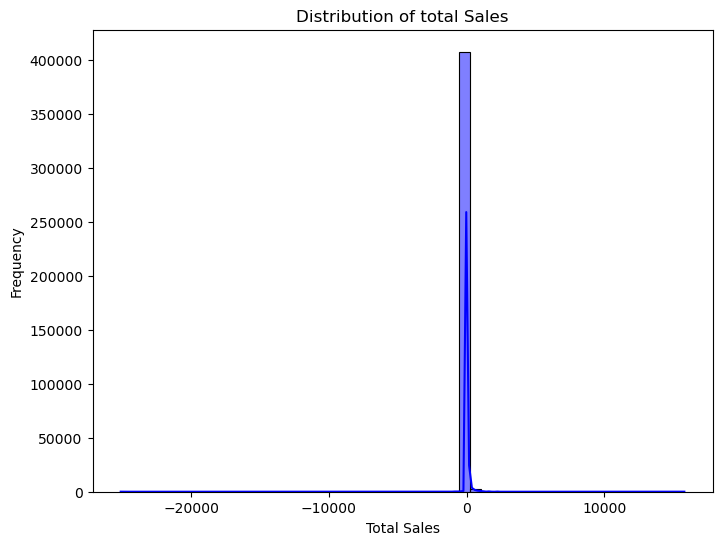

In [64]:
#EDA
plt.figure(figsize=(8,6))
sns.histplot(dfc['TotalSales'], kde=True, bins= 50, color= 'blue')
plt.title('Distribution of total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()

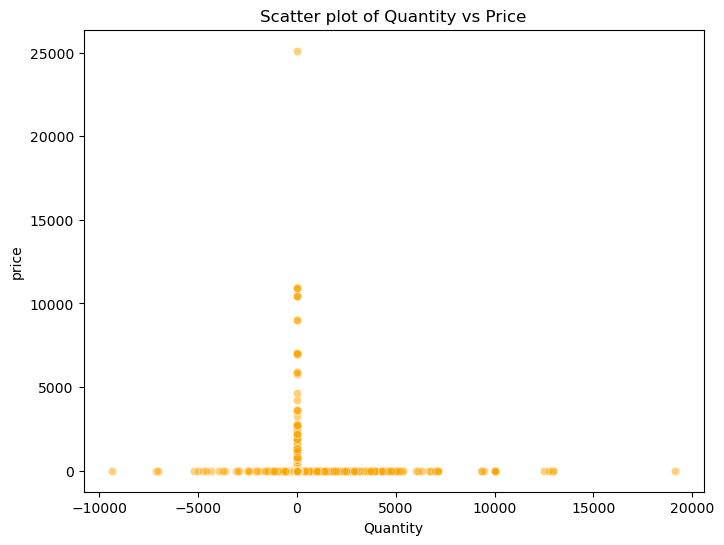

In [66]:
#Trying to find the relationship between Quantity and unitprice
plt.figure(figsize=(8,6))
sns.scatterplot(data=dfc, x = 'Quantity', y='Price', alpha = 0.5, color='orange')
plt.title('Scatter plot of Quantity vs Price')
plt.xlabel('Quantity')
plt.ylabel('price')
plt.show()

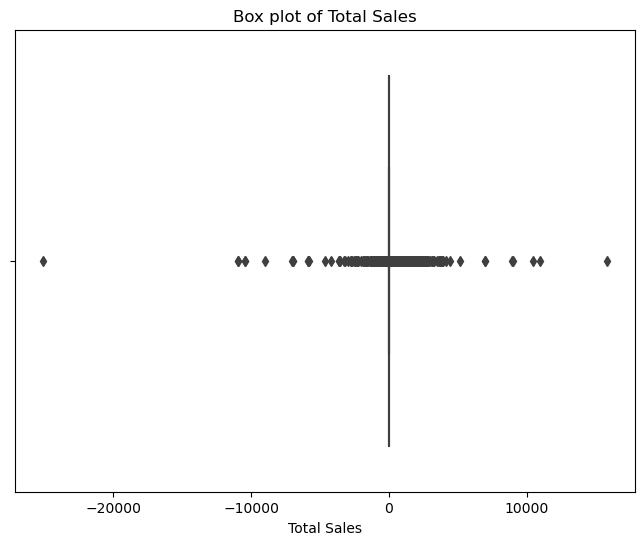

In [67]:
plt.figure(figsize=(8,6))
sns.boxplot(x= dfc['TotalSales'])
plt.title('Box plot of Total Sales')
plt.xlabel('Total Sales')
plt.show()

In [70]:
#scaling

scaler= StandardScaler()
dfc['TotalSalesScaled'] = scaler.fit_transform(dfc[['TotalSales']])
dfc

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales,TotalSalesScaled
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01-12-2009 07:45,6.95,13085.0,United Kingdom,83.40,0.627118
1,489434,79323P,PINK CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom,81.00,0.603288
2,489434,79323W,WHITE CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom,81.00,0.603288
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01-12-2009 07:45,2.10,13085.0,United Kingdom,100.80,0.799891
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01-12-2009 07:45,1.25,13085.0,United Kingdom,30.00,0.096887
...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,09-12-2010 20:01,2.95,17530.0,United Kingdom,5.90,-0.142413
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,09-12-2010 20:01,3.75,17530.0,United Kingdom,3.75,-0.163761
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,09-12-2010 20:01,3.75,17530.0,United Kingdom,3.75,-0.163761
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,09-12-2010 20:01,3.75,17530.0,United Kingdom,7.50,-0.126525


In [71]:
print('Summary statistics  of scaled data')
print(dfc['TotalSalesScaled'].describe())

Summary statistics  of scaled data
count    4.107630e+05
mean     4.864231e-17
std      1.000001e+00
min     -2.495398e+02
25%     -1.563137e-01
50%     -8.382887e-02
75%     -7.372254e-03
max      1.568667e+02
Name: TotalSalesScaled, dtype: float64


**Session 15 SOURCE CODE**

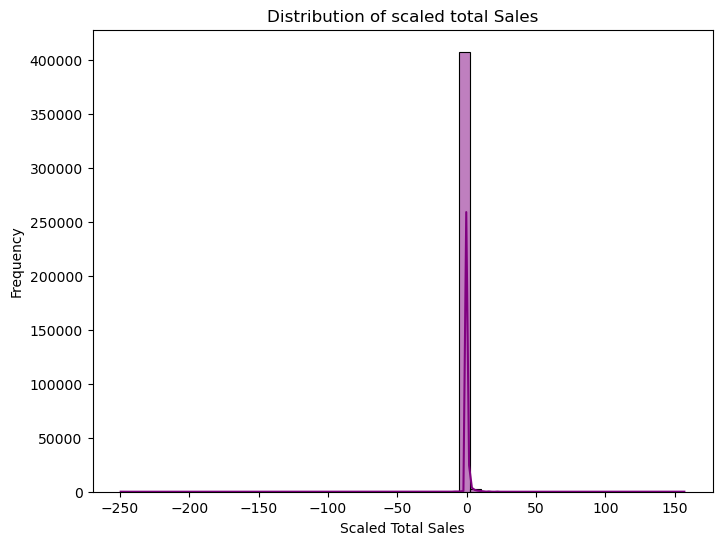

In [73]:
plt.figure(figsize=(8,6))
sns.histplot(dfc['TotalSalesScaled'], kde=True, bins= 50, color= 'purple')
plt.title('Distribution of scaled total Sales')
plt.xlabel('Scaled Total Sales')
plt.ylabel('Frequency')
plt.show()

In [74]:
dfc['TotalSales_Normalized'] = (dfc['TotalSales']-dfc['TotalSales'].min())/(dfc['TotalSales'].max()-dfc['TotalSales'].min())
dfc

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales,TotalSalesScaled,TotalSales_Normalized
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01-12-2009 07:45,6.95,13085.0,United Kingdom,83.40,0.627118,0.615558
1,489434,79323P,PINK CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom,81.00,0.603288,0.615500
2,489434,79323W,WHITE CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom,81.00,0.603288,0.615500
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01-12-2009 07:45,2.10,13085.0,United Kingdom,100.80,0.799891,0.615983
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01-12-2009 07:45,1.25,13085.0,United Kingdom,30.00,0.096887,0.614254
...,...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,09-12-2010 20:01,2.95,17530.0,United Kingdom,5.90,-0.142413,0.613665
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,09-12-2010 20:01,3.75,17530.0,United Kingdom,3.75,-0.163761,0.613612
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,09-12-2010 20:01,3.75,17530.0,United Kingdom,3.75,-0.163761,0.613612
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,09-12-2010 20:01,3.75,17530.0,United Kingdom,7.50,-0.126525,0.613704


In [75]:
print('Summary statistics  of normalized data')
print(dfc['TotalSales_Normalized'].describe())

Summary statistics  of normalized data
count    410763.000000
mean          0.614015
std           0.002461
min           0.000000
25%           0.613631
50%           0.613809
75%           0.613997
max           1.000000
Name: TotalSales_Normalized, dtype: float64


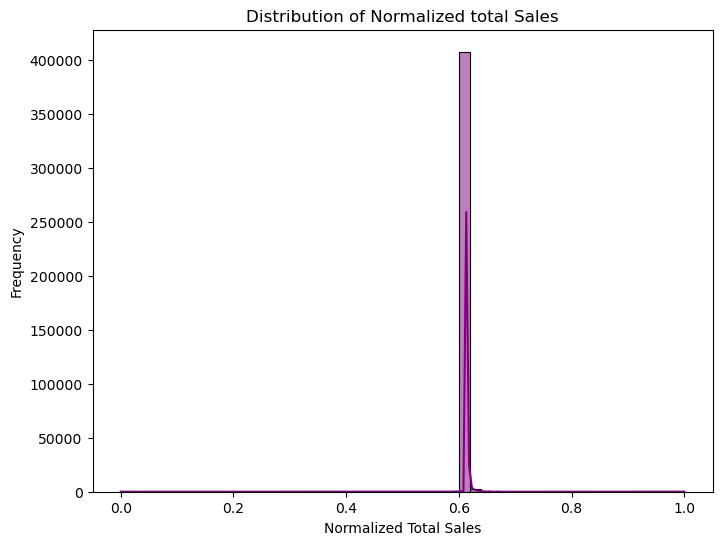

In [77]:
plt.figure(figsize=(8,6))
sns.histplot(dfc['TotalSales_Normalized'], kde=True, bins= 50, color= 'purple')
plt.title('Distribution of Normalized total Sales')
plt.xlabel('Normalized Total Sales')
plt.ylabel('Frequency')
plt.show()

In [79]:
dfc.to_csv('Cleaned_Online_Retail.csv', index= False)
print(' Cleaned and Scaled dataset saved as "Cleaned_Online_Retail.csv" ')

 Cleaned and Scaled dataset saved as "Cleaned_Online_Retail.csv" 
